## **TRABALHO 1 DE PROCESSAMENTO DIGITAL DE SINAIS**
Alunos: 
            Keli Tauana Prass Ruppenthal,
            Moisés Goulart de Oliveira,
            Victor Dallagnol Bento e
            Yuri Oliveira

### **Métodos utilizados:**
*   **numpy:** para gerar o audio.
*   **IPython.display:** para trocar o audio.
*   **scipy.signal:** para carregar filtros e funções.
*   **matplotlib.pyplot:** para plotar.
*   **librosa:** Auxilia na visualização do áudio.


In [0]:
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
import librosa
import librosa.display

%matplotlib inline

Função *OverLap-Save*.

In [0]:
def overlapsave (x, h):
    L = len(x)  # length of input signal
    N = len(h)  # length of impulse response
                #P length of segments
    P = len(h)+1
    # overlap-save convolution
    nseg = (L+N-1)//(P-N+1) + 1
    x = np.concatenate((np.zeros(N-1), x, np.zeros(P)))
    xp = np.zeros((nseg, P))
    yp = np.zeros((nseg, P))
    y = np.zeros(nseg*(P-N+1))
    print(str(nseg) + ' blocos')
    for p in range(nseg):
        xp[p, :] = x[p*(P-N+1):p*(P-N+1)+P]
        yp[p, :] = np.fft.irfft(np.fft.rfft(xp[p, :]) * np.fft.rfft(h, P))
        y[p*(P-N+1):p*(P-N+1)+P-N+1] = yp[p, N-1:]
    y = y[0:N+L]
    return y


O *LibROSA* é um pacote python para análise de música e áudio. Ele fornece os blocos de construção necessários para criar sistemas de recuperação de informações musicais.

In [1]:
x, sr = librosa.load('audio3.wav') 
# x = sinal (signal)
# sr = amostra simples (simple rate)

# print(x.shape, sr)

NameError: ignored

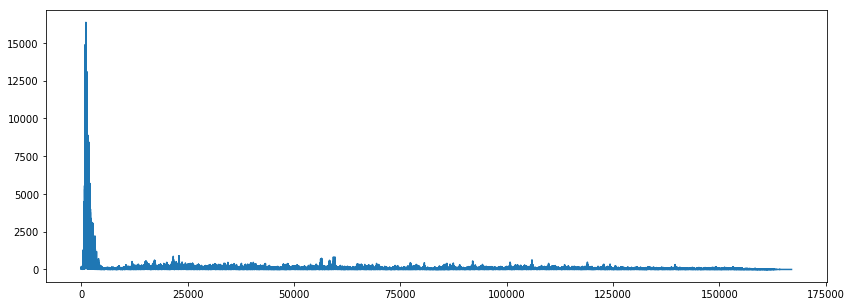

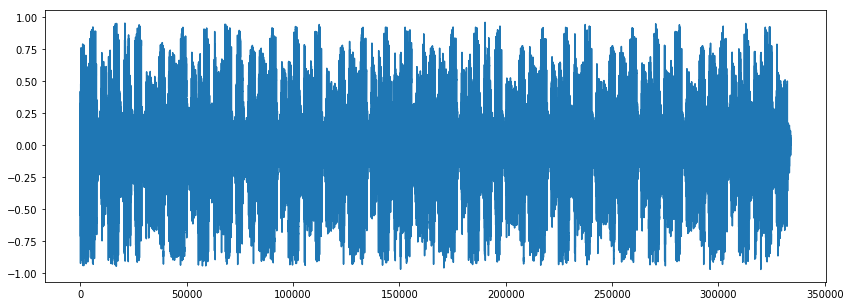

In [0]:
# plota amostra do sinal de entrada
plt.figure(figsize=(14, 5))
plt.plot(abs(np.fft.rfft(x))) #aqui só é plotado da metade pro fim
plt.show()

plt.figure(figsize=(14, 5))
plt.plot((x)) #grafico da entrada


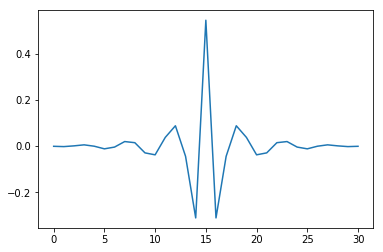

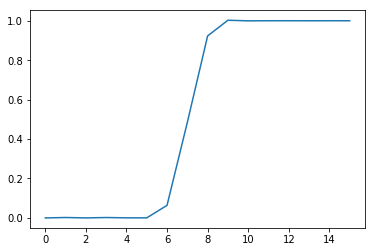

In [0]:
# Filtro passa altas

# Configuration.
fS = 44100  # Sampling rate.
fH = 10000  # Cutoff frequency.
N = 31  # Filter length, must be odd.
beta = 4.534  # Kaiser window beta.

# Compute sinc filter.
h = np.sinc(2 * fH / fS * (np.arange(N) - (N - 1) / 2.))

# Apply window.
h *= np.kaiser(N, beta)

# Normalize to get unity gain.
h /= np.sum(h)

# Create a high-pass filter from the low-pass filter through spectral inversion.
h = -h
h[(N - 1) // 2] += 1


plt.plot(h)
plt.show()
plt.plot(abs(np.fft.rfft(h)))

166964 blocos


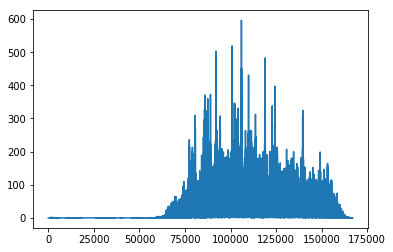

In [0]:
Y = overlapsave(x,h)
plt.plot(abs(np.fft.rfft(Y))) # sinal de saída filtrado

Verificação do audio final.

In [0]:
# entrada 
ipd.Audio(x, rate=sr)

In [0]:
# saida 
ipd.Audio(Y, rate=sr)

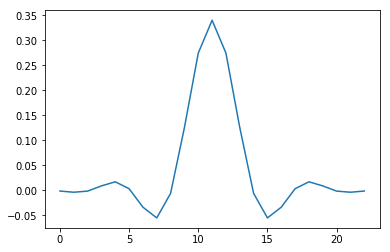

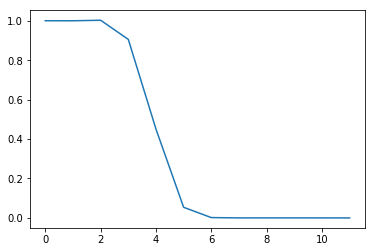

In [0]:
#passa baixas
# Configuration.
fS = 44100  # Sampling rate.
fL = 7497  # Cutoff frequency.
N = 23  # Filter length, must be odd.
beta = 4.534  # Kaiser window beta.

# Compute sinc filter.
h = np.sinc(2 * fL / fS * (np.arange(N) - (N - 1) / 2.))

# Apply window.
h *= np.kaiser(N, beta)

# Normalize to get unity gain.
h /= np.sum(h)



plt.plot(h)
plt.show()
plt.plot(abs(np.fft.rfft(h)))

166960 blocos


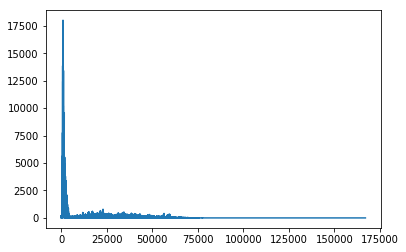

In [0]:
Y = overlapsave(x,h)

plt.plot(abs(np.fft.rfft(Y))) # sinal de saída filtrado
# saida 
ipd.Audio(Y, rate=sr)

**Referencias**
* https://fiiir.com/
* http://www.numpy.org/
* https://librosa.github.io/librosa/
* https://musicinformationretrieval.com/ipython_audio.html
* https://dsp-nbsphinx.readthedocs.io/en/nbsphinx-experiment/nonrecursive_filters/segmented_convolution.html